# EXPLORATORY DATA ANALYSIS

I'm performing some EDA for a better understanding of the dataset:

In [1]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#warnings
import warnings

In [5]:
#importing csv
fetal = pd.read_csv('fetal_health.csv')

#showing head
fetal.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [80]:
#showing shape
fetal.shape

(2126, 22)

In [16]:
#dataset description
fetal.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


There is a great variation between the numbers, in terms of orders of magnitude: we just need to look at the mean values of the first columns to realize this. We will need to scale the features. 

The average value of 'fetal_healt' (the class column) is 1.3, which tells me that on average the values ​​are more in the reference class 1, but, for a better understanding of the distribution of the classes, later we'll make a histogram (this will even help us on checking the balance between the classes).

In [17]:
#check for null values
fetal.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

There are no Nan values.

Considering that the samples are "relatively few" ( $2126$ lines), the check on the outliers, the balancing of the dataset, and the feature selection will be made in the complete dataset (without splitting into "train" and "test" set).

## Balance

In [6]:
#counting the number related to the classes in the outcome column
fetal['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

This is a multi-class problem with 3 classes. The dataset, however, is not balanced as class 1 has 10 times the number of data in class 3. To see it better, I also make a histogram:

Text(0, 0.5, 'FREQUENCIES')

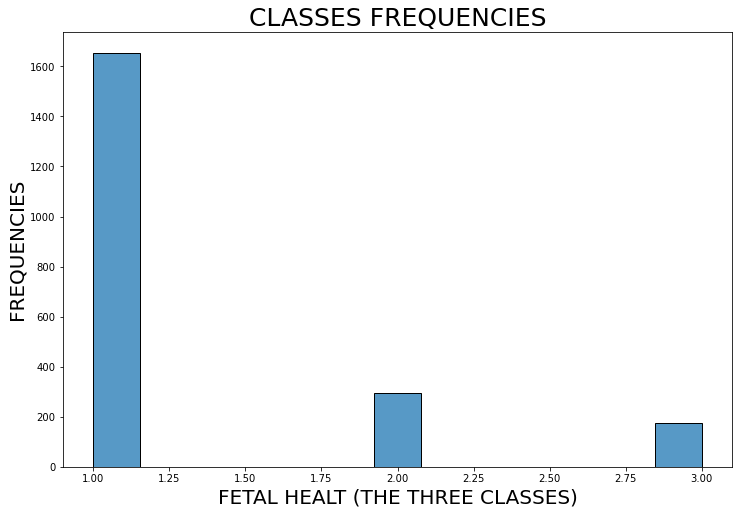

In [7]:
#image dimensions
plt.rcParams['figure.figsize'] = 12, 8

#histogram
sns.histplot(data=fetal, x='fetal_health')

#title and axis labels
plt.title('CLASSES FREQUENCIES', fontsize=25) #plot TITLE
plt.xlabel('FETAL HEALT (THE THREE CLASSES)', fontsize=20) #x-axis label
plt.ylabel('FREQUENCIES', fontsize=20) #y-axis label

I could remove the data relating to class 3, since the samples are $1/10$ of those of class 1 but:

- I would have to do the same with class 2, which is numerically comparable to class 1. But, then, there would be only one class left...
- the total of samples is a little too low

So, I keep the data as it is, without balancing.

Furthermore, we have to say that we are studying a dataset related to fetal diseases in which we have three classes that we can call as follows:
- class 1: Normal
- class 2: Suspect
- class 3: Pathological


This means that class 3 is associated with a rare fetal disease and this justifies the classes imbalance

## Outliers detection

I use `IsolationForest` for outliers detection on the whole dataset:

In [6]:
# identifying outliers 
iso = IsolationForest()
y_outliers = iso.fit_predict(fetal)

#droping outliers rows
for i in range(len(y_outliers)):
    if y_outliers[i] == -1:
        fetal.drop(i,inplace = True)

In [7]:
#checking new shape
fetal.shape

(1879, 22)

the number of rows has decreased because I've dropped the rows with the outliers

## Correlation matrix

I'm calculating the correlation matrix:

<AxesSubplot:>

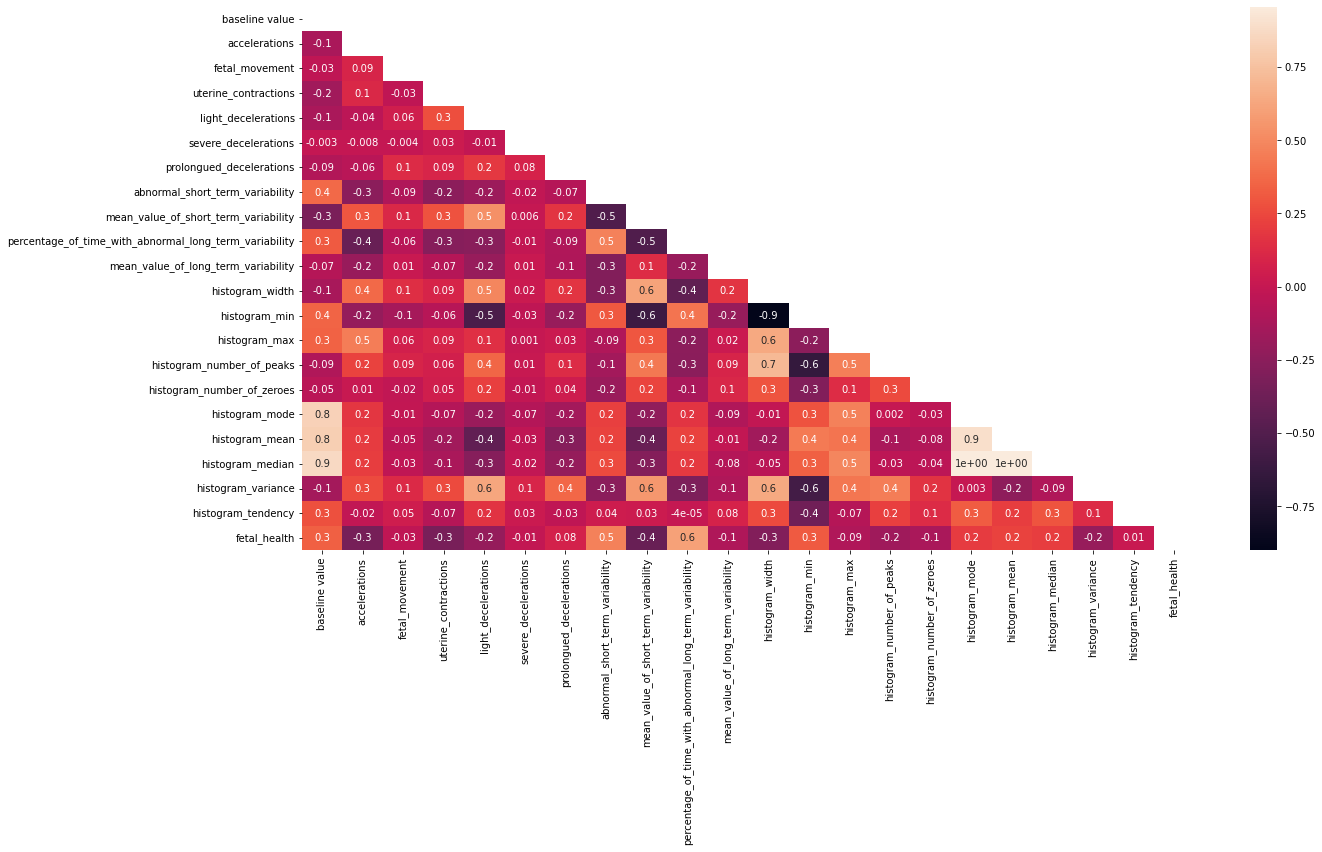

In [8]:
#figure size
plt.figure(figsize=(20, 10))

#applying mask
mask = np.triu(np.ones_like(fetal.corr()))

#heat map for correlation coefficient
sns.heatmap(fetal.corr(), annot=True, fmt="0.1", mask=mask)

Since this is a (multi-class) classification problem, it makes no sense to look at the correlation between the features and the label(s): what we have to do is to look at the correlation between the features; in fact, there are featues that are highly correlated, for example:

- baseline_value e histogram_mode
- baseline_value e histogram_median
- histogram_mode _mean e _median sono tutte altamente correlate tra di loro
- histogram_width e _min

Highly correlated features are highly linearly dependent,  which means that they have the same effect on the labels; so, I can decide to eliminate some of them to simplify the analysis.

I make a plot do understand the distributions:

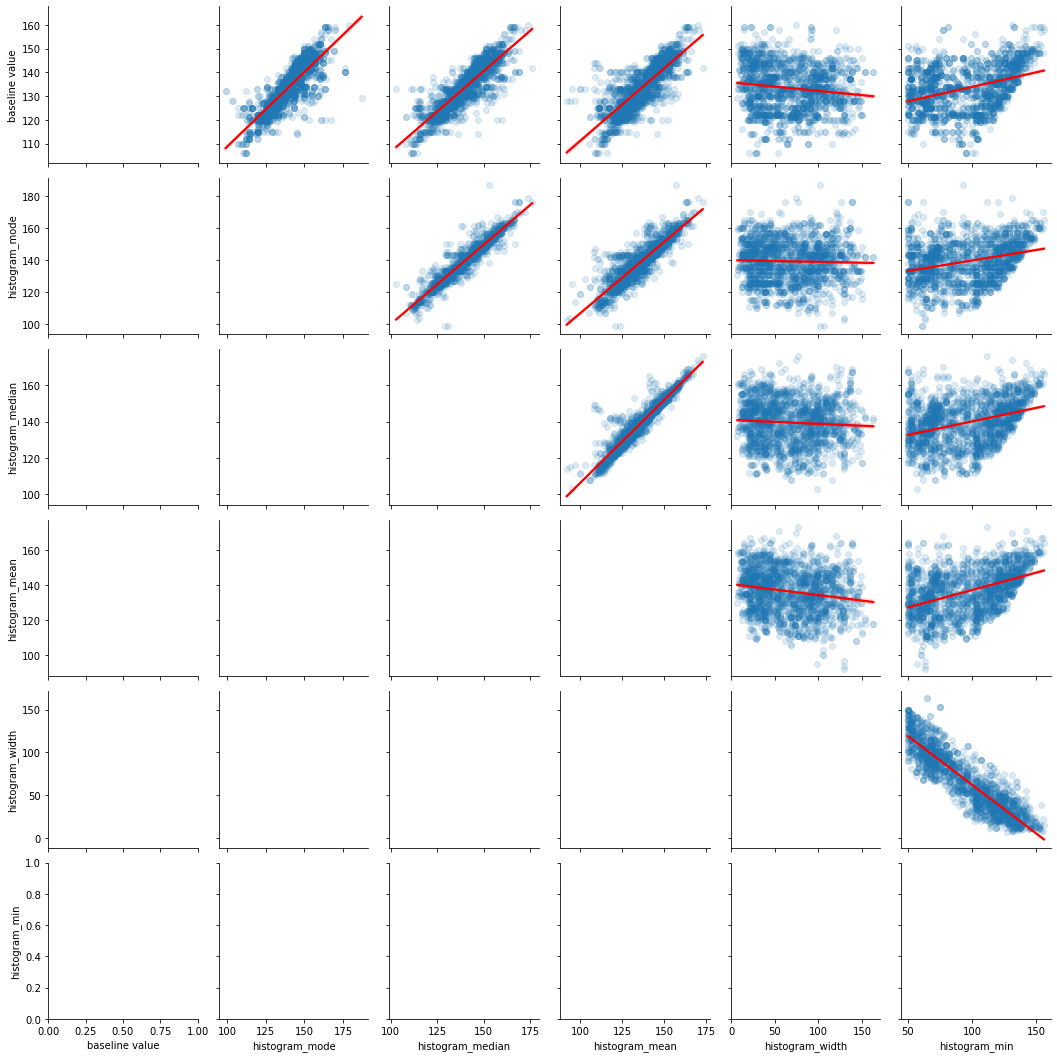

In [22]:
#creating a subtdataframe
a = fetal[['baseline value', 'histogram_mode', 'histogram_median', 'histogram_mean', 'histogram_width', 'histogram_min']]

#creating a unique plot with the regressions
g = sns.PairGrid(a)
g = g.map_upper(sns.regplot, scatter_kws={'alpha':0.15}, line_kws={'color': 'red'})

As expected, the features indicated above are really highly correlated, as can be seen from the graphs; so, I can choose to delete some of them. For example, by crossing the various graphs, I choose to eliminate the following features:

- histogram_min
- histogram_mean

(eliminating more features would result in the loss of some data, because they are all crossed with each other)

In [5]:
#droping the columns specified above
fetal.drop(['histogram_mean', 'histogram_min'], axis=1, inplace=True)

#showing new shape
fetal.shape

(1887, 20)

## Features selection

Feature selection can not be done on the entire dataset (here an interesting discussion on this topic: https://stackoverflow.com/questions/56308116/should-feature-selection-be-done-before-train-test-split-or-after), so I divide the dataset in "train" and "test" set and perform the features selection with the mutual information method and with anova f-test, then I compare the results:

Defining $X$ (features) and $y$ (label):

In [6]:
#features
X = fetal.iloc[:,:-1]

#label
y = fetal.iloc[:,-1]

Scaling the features:

In [25]:
#normalizing features
scaler = StandardScaler() #calling the scaler
X = scaler.fit_transform(X) #fitting the features to scale them

#splitting
seed = 172 #defining seed
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=seed)

Now I can perform the features selection.

### Mutual Information method

In [13]:
#mutual information selecting all features
mutual = SelectKBest(score_func=mutual_info_classif, k='all')

#learn relationship from training data
mutual.fit(X_train, y_train)

# transform train input data
X_train_mut = mutual.transform(X_train)

# transform test input data
X_test_mut = mutual.transform(X_test)

In [16]:
#printing scores of the features
for i in range(len(mutual.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.124999
Feature 1: 0.139990
Feature 2: 0.031640
Feature 3: 0.092322
Feature 4: 0.066883
Feature 5: 0.002289
Feature 6: 0.008455
Feature 7: 0.194067
Feature 8: 0.222438
Feature 9: 0.144378
Feature 10: 0.034891
Feature 11: 0.118958
Feature 12: 0.025970
Feature 13: 0.033416
Feature 14: 0.015075
Feature 15: 0.108909
Feature 16: 0.085122
Feature 17: 0.103669
Feature 18: 0.000000


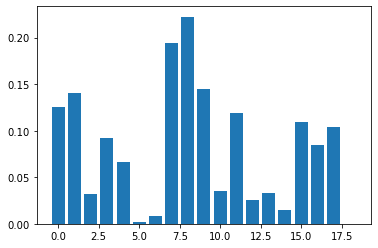

In [17]:
#plot the scores
plt.bar([i for i in range(len(mutual.scores_))], mutual.scores_)
plt.show()

### Anova f-test

In [92]:
# configure to select all features
an = SelectKBest(score_func=f_classif, k='all')

# learn relationship from training data
an.fit(X_train, y_train)

# transform train input data
X_train_an = an.transform(X_train)

# transform test input data
X_test_an = an.transform(X_test)

In [93]:
#printing scores of the features
for i in range(len(an.scores_)):
    print('Feature %d: %f' % (i, mutual.scores_[i]))

Feature 0: 0.117919
Feature 1: 0.176444
Feature 2: 0.006887
Feature 3: 0.089149
Feature 4: 0.064985
Feature 5: 0.054356
Feature 6: 0.090783
Feature 7: 0.144446
Feature 8: 0.191335
Feature 9: 0.200292
Feature 10: 0.081927
Feature 11: 0.096509
Feature 12: 0.000000
Feature 13: 0.042977
Feature 14: 0.105467
Feature 15: 0.027062
Feature 16: 0.072015
Feature 17: 0.198037
Feature 18: 0.018785


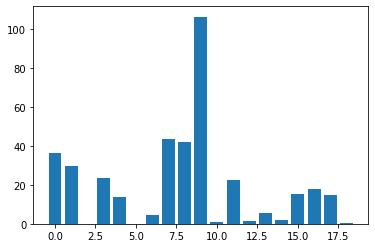

In [94]:
# plot the scores
plt.bar([i for i in range(len(an.scores_))], an.scores_)
plt.show()

The results obtained in terms of the importance of the features are quite different between the two methods for a very simple reason: `Anova f-test` is able to 'feel' the linear dependence between the features, while the `mutual information` 'feels' any type of dependence, in particular it 'feels' the non-linear ones.

Considering the results obtained with the correlation matrix and the consequent elimination of two features following the graphs with linear regression, then, coherently, the mutual information indicates better than `Anova f-test` which are the features that really matter for this type of problem (ref.: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html)

# METRICS SELECTION

`Accuracy` will not give me the confidence that I have developed a good model (and this is true in general: `accuracy` alone is not enough), so I have to find other metrics to evaluate it. 

Other metrics I'm going to use will be:

- the `cunfusion matrix`
- the `Kernel Density Estimation` (KDE) curves to see how the models approximate the probability density of the predicted values, compared to the real ones on the test set

# METHOD 1: I USE ALL FEATURES FOR  THE PREDICTION

I perform a spot check with `StratifiedKFold` which is used in cases with unbalanced classes, as in this case. The modes to be spotted will be: `Logistic Regression`, `Random Forest`, `KNN`.

I decide to use only one evaluation metric at this stage; for simplicity, I choose accuracy. I will then use the other metrics chosen before for evaluating the performance of the models.

## Logistic Regression

In [27]:
#kfold crossvalidation
kfold = model_selection.KFold(n_splits=5)

#logistic regression model
model_lr = LogisticRegression(max_iter=150)

#results
results = model_selection.cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.83


## Random Forest Classifier

In [28]:
#random forest model
model_rf = RandomForestClassifier(random_state=seed)

#results
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.80


## K-Nearest Neighbors

For Knn, I do a 'pre-validation' to choose k, but I do it on the train set:

In [7]:
#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_accuracy = accuracy_score(y_train, y_train_pred)
    print('Validation accuracy with k {}: {:.2f}'.format(k, validation_accuracy)) 

Validation accuracy with k 3: 0.95
Validation accuracy with k 5: 0.92
Validation accuracy with k 7: 0.91
Validation accuracy with k 9: 0.92


Generally speaking, it is a good idea to choose an odd k value.

I choose $k=3$ to continue with the crossvalidation:

In [13]:
#knn model
model_knn = KNeighborsClassifier(n_neighbors=3)

#results
results = model_selection.cross_val_score(model_knn, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.89


This is the least performing model, so it will not be used in the next phases of the hyperparameter tuning study.

## Hyperparameters tuning

### Logistic regression

In [9]:
#ignoring warnings for the during the search of the best hyperparameters for LR
warnings.filterwarnings('ignore')

In [29]:
#defining the logistic regression model
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)

#define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

#define search
search = GridSearchCV(model_lr, space, scoring='accuracy', cv=cv, n_jobs=-1)

#perform the search on the trai dataset
results = search.fit(X_train, y_train)

#printing
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Best Score: 0.837809266756635
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


I evaluate the performance of `Logistic Regression` with the best hyperparameters found above:

In [58]:
#defining the logistic regression model
model_lr = LogisticRegression(C=10, penalty='l2', solver='newton-cg', random_state=seed).fit(X_train, y_train)

#predictions and model accuracy
y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

#accuracy
print(f'Model accuracy on test set: {accuracy_score(y_test, y_test_pred):.2f}')

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print(f'Model precision: {prec: .2f}')

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall precision: {rec: .2f}')

Model accuracy on test set: 0.85
Model precision:  0.82
Recall precision:  0.85


The `confusion matrix`:

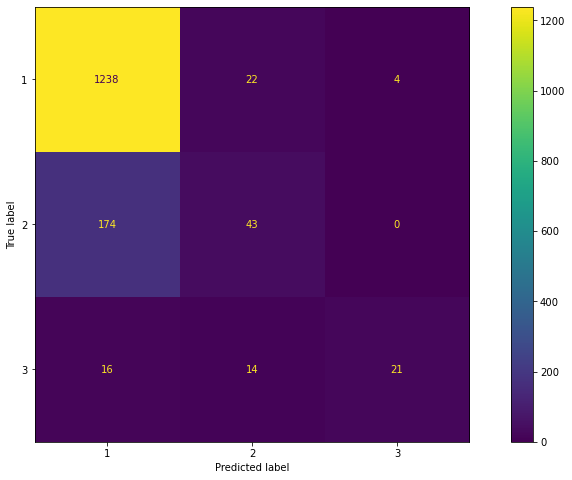

In [59]:
#image size
plt.rcParams['figure.figsize'] = 15,8

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

#plotting
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,2,3])
cmd.plot()

As we can see, the true positives and true negatives (the values on the diagonal) are well predicted, since the values on the diagonal are much higher than the others.

I plot a `KDE` graph:

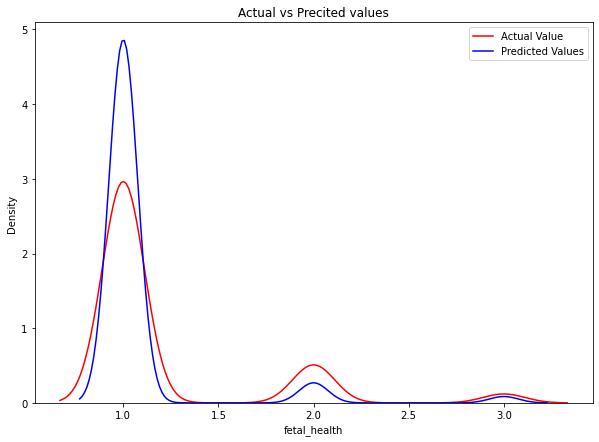

In [32]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

As  we can see, class 3 is predicted very well; class 2 is undererestimated; class 1 is overestimated.

### Random Forest Classifier

In [33]:
#defining random forest model
model_rf = RandomForestClassifier(random_state=seed)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)

#printing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.844980 using {'max_features': 'sqrt', 'n_estimators': 100}


 evaluate the performance of `Random Forest` with the best hyperparameters found above:

In [57]:
#defining random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed).fit(X_train, y_train)

#predictions and model accuracy
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

#accuracy
print(f'Model accuracy on test set: {accuracy_score(y_test, y_test_pred):.2f}')

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print(f'Model precision: {prec: .2f}')

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall precision: {rec: .2f}')

Model accuracy on test set: 0.83
Model precision:  0.81
Recall precision:  0.83


The `Confusion Matrix`:

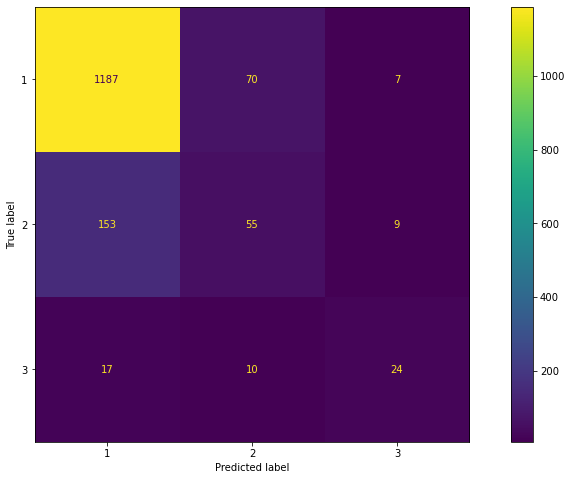

In [35]:
#image size
plt.rcParams['figure.figsize'] = 15,8

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

#plotting
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,2,3])
cmd.plot()

Even here the diagonal values shows that the values are well predicted.

I plot a `KDE` graph:

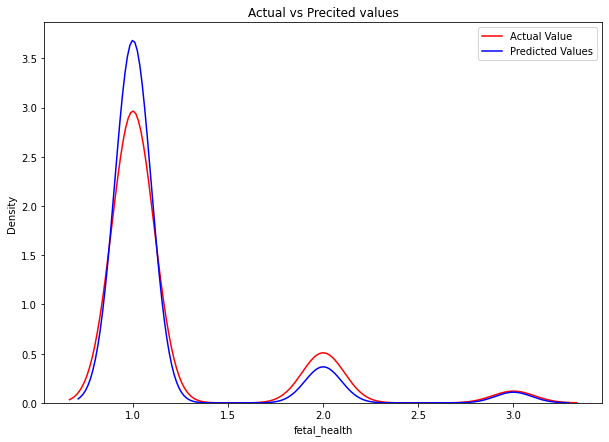

In [36]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Here it is interesting to note how, despite the numerical results of the RF metrics (precision, recall and accuracy) are higher, on average, than those of LR, KDE graphically shows us very different results between real and predicted values, which leads me to underline how much it is important to think about this graph for the choice of the final model.

# METHOD 2: I CHOOSE THE MOST RELEVANT FEATURES FOR THE STUDY OF MODELS


As previously indicated, I refer to the results obtained with the mutual information to understand which are the most important features. From the graph above, I choose the 3 features in the center of the graph itself:

- Feature 7 --> prolongued_decelerations
- Feature 8 --> abnormal_short_term_variability
- Feature 9 --> mean_value_of_short_term_variability

I create a sub-dataframe with just these features and analyze it:

In [37]:
#fetal 'reducted'
fetal_red = fetal[['prolongued_decelerations', 'abnormal_short_term_variability', 'fetal_health']]

#showing head
fetal_red.head()

,prolongued_decelerations,abnormal_short_term_variability,fetal_health
1,0.0,17.0,1.0
2,0.0,16.0,1.0
3,0.0,16.0,1.0
4,0.0,16.0,1.0
7,0.0,83.0,3.0


I have to redefine $X$ and $y$ and split the dataset:

In [38]:
#features
X = fetal_red.iloc[:,:-1]

#label
y = fetal_red.iloc[:,-1]

#normalizing features
scaler = StandardScaler() #calling the scaler
X = scaler.fit_transform(X) #fitting the features to scale them

#splitting
seed = 172 #defining a seed
X_test, X_train, y_test, y_train = train_test_split(X, y, test_size=0.2, random_state=seed)

I do the spot check of the 3 models to select the best 2, as done before.

## Logistic Regression

In [40]:
#kfold crossvalidation
kfold = model_selection.KFold(n_splits=5)

#logistic regression model
model_lr = LogisticRegression(max_iter=150)

#results
results = model_selection.cross_val_score(model_lr, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.83


## Random Forest

In [41]:
#random forest model
model_rf = RandomForestClassifier(random_state=seed)

#results
results = model_selection.cross_val_score(model_rf, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.80


## K-nearest neigbhor

As before, I perform a 'prevalidation' for $k$:

In [42]:
#k pre-validation 
for k in [3,5,7,9]:
    model_knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_train_pred = model_knn.predict(X_train)
    validation_accuracy = accuracy_score(y_train, y_train_pred)
    print('Validation accuracy with k {}: {:.2f}'.format(k, validation_accuracy)) 

Validation accuracy with k 3: 0.86
Validation accuracy with k 5: 0.86
Validation accuracy with k 7: 0.86
Validation accuracy with k 9: 0.85


In this case we obtain the same accuracy for every $k$.

I continue with the spot check with $k = 3$:

In [43]:
#knn model
model_knn = KNeighborsClassifier(n_neighbors=3)

#results
results = model_selection.cross_val_score(model_knn, X_train, y_train, cv=kfold, scoring='accuracy')

#printing results mean value
print(f'Accuracy: {results.mean():.2f}')

Accuracy: 0.80


Also in this case, `LR` performs better than `KNN` and `RF`  but in this case they have the same accuracy. Between the two, I choose `RF`.

I continue with the tuning:

## Hyperparameters tuning

### Random Forest

In [56]:
#defining random forest model
model_rf = RandomForestClassifier(random_state=seed)
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']

# define grid search
grid = dict(n_estimators=n_estimators, max_features=max_features)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=seed)
grid_search = GridSearchCV(estimator=model_rf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(X, y)

#printing results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.847103 using {'max_features': 'sqrt', 'n_estimators': 1000}


I evaluate the performance of `Random Forest` with the best hyperparameters found above:

In [54]:
#defining random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=seed).fit(X_train, y_train)

#predictions and model accuracy
y_test_pred = model_rf.predict(X_test)
y_train_pred = model_rf.predict(X_train)

#accuracy
print(f'Model accuracy on test set: {accuracy_score(y_test, y_test_pred):.2f}')

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print(f'Model precision: {prec: .2f}')

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall precision: {rec: .2f}')

Model accuracy on test set: 0.83
Model precision:  0.81
Recall precision:  0.83


`Confusion matrix`:

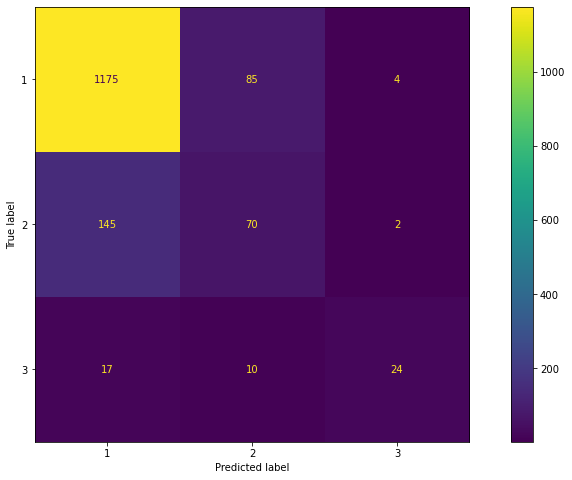

In [55]:
#image size
plt.rcParams['figure.figsize'] = 15,8

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

#plotting
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,2,3])
cmd.plot()

The confusion matrix shows that the prediction is good, if we look at the diagonal values, but the 145 value is a little too high

I plot a `KDE`:

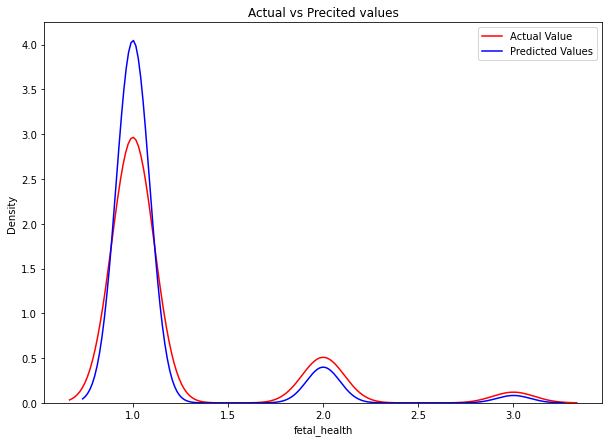

In [47]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Class 3 is very well predicted; class 2 is predicted well; class 1 is a little overestimated.

### Logistic Regression

In [50]:
#defining the logistic regression model
model_lr = LogisticRegression(max_iter=150, random_state=seed)

#define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]

#define search
search = GridSearchCV(model_lr, space, scoring='accuracy', cv=cv, n_jobs=-1)

#perform the search on the trai dataset
results = search.fit(X_train, y_train)

#printing
print('Best Score: %s' % results.best_score_)
print('Best Hyperparameters: %s' % results.best_params_)

Best Score: 0.8358749437696805
Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


In [51]:
#defining the logistic regression model
model_lr = LogisticRegression(C=10, penalty='l2', solver='newton-cg', random_state=seed).fit(X_train, y_train)

#predictions and model accuracy
y_test_pred = model_lr.predict(X_test)
y_train_pred = model_lr.predict(X_train)

#accuracy
print(f'Model accuracy on test set: {accuracy_score(y_test, y_test_pred):.2f}')

#precision
prec = precision_score(y_test, y_test_pred, average='weighted')
print(f'Model precision: {prec: .2f}')

#recall
rec = recall_score(y_test, y_test_pred, average='weighted')
print(f'Recall precision: {rec: .2f}')

Model accuracy on test set: 0.85
Model precision:  0.82
Recall precision:  0.85


`Confusion Matrix`:

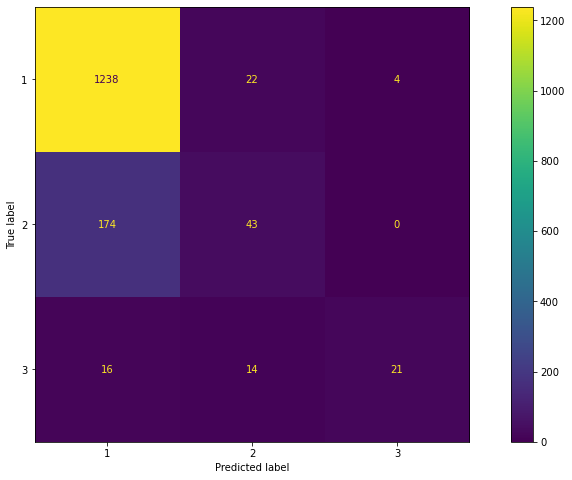

In [52]:
#image size
plt.rcParams['figure.figsize'] = 15,8

#confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

#plotting
cmd = ConfusionMatrixDisplay(cm, display_labels=[1,2,3])
cmd.plot()

The `confusion matrix` shows that the prediction is good, if we look at the diagonal values, but the 174 value is a little too high

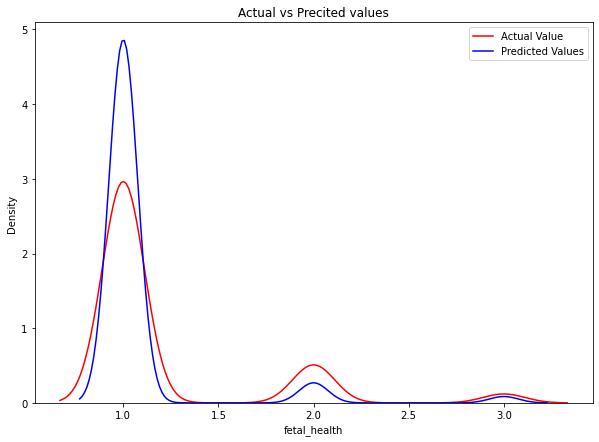

In [53]:
#figure size
plt.figure(figsize=(10, 7))

#Kernel Density Estimation plot
ax = sns.kdeplot(y_test, color="r", label="Actual Value") #actual values
sns.kdeplot(y_test_pred, color="b", label="Predicted Values", ax=ax) #predicted values

#showing title
plt.title('Actual vs Precited values')
#showing legend
plt.legend()
#showing plot
plt.show()

Class 3 is very well predicted; class 2 is a little underestimated; class 1 is overestimated.

# CHOICE OF THE MODEL: DISCUSSIONS AND CONCLUSIONS ABOUT THE PROJECT

In the end, following route 2, I would choose the `Random Forest` model mainly based on `KDE` because - I didn't say it before and I say it now - I chose "`average = 'weighted'`" in the calculation of the metrics (accuracy, precision, recall) because, being a multi-class problem, in this way I obtained numerical values weighted by class (which seemed to me the best choice, since the dataset is unbalanced); therefore, I think the `KDE` graph is more reliable than the other metrics for the final evaluation, which in any case must be taken into consideration.

This is true regardless of the fact that, obviously, `Logistic Regression` does not approximate the real values with the predicted ones at all (in addition to the fact that a class is not predicted at all!).

As a father of two girls, moreover, having a model that predicts the pathological condition very precisely (class 3) would make me start 'to make myself a reason' about a future problem; I also believe that the predicted values for the normal (1) and suspect (2) classes are acceptable (again with respect to `KDE`), also because if you fall into the suspect class I expect, however, that physically there are exams to be done in followed by confirmation of relapse in class 1 or class 3.